In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
file_path = '/content/sample_data/student-por.csv'
student_por = pd.read_csv(file_path,  delimiter=';')

# Display the first few rows of the dataset
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
file_path = '/content/sample_data/student-mat.csv'
student_math = pd.read_csv(file_path,  delimiter=';')

# Display the first few rows of the dataset
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
student_math.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [4]:
print(student_math.shape)
student_por.shape

(395, 33)


(649, 33)

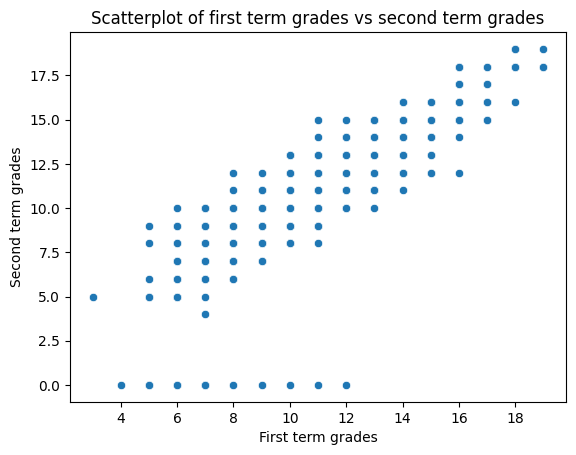

In [6]:
sns.scatterplot(x='G1', y='G2', data=student_math)

# Add labels and title
plt.xlabel('First term grades')
plt.ylabel('Second term grades')
plt.title('Scatterplot of first term grades vs second term grades')

# Show the plot

plt.show()

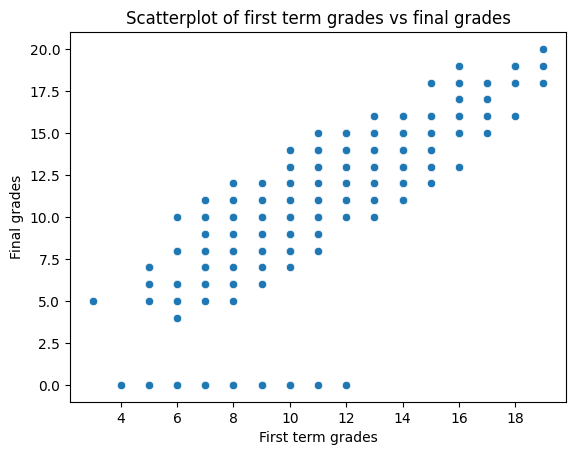

In [19]:
sns.scatterplot(x='G1', y='G3', data=student_math)

# Add labels and title
plt.xlabel('First term grades')
plt.ylabel('Final grades')
plt.title('Scatterplot of first term grades vs final grades')

# Show the plot

plt.show()

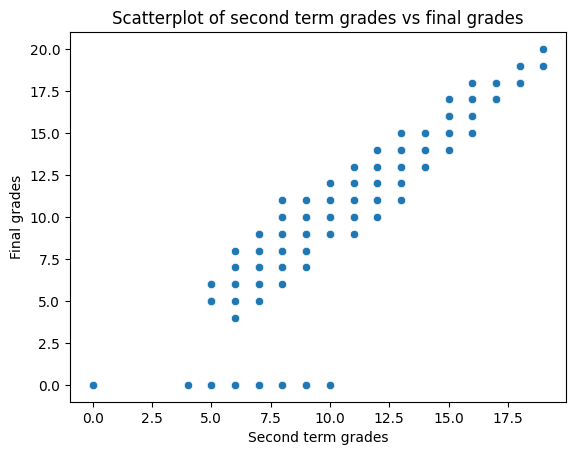

In [20]:
sns.scatterplot(x='G2', y='G3', data=student_math)

# Add labels and title
plt.xlabel('Second term grades')
plt.ylabel('Final grades')
plt.title('Scatterplot of second term grades vs final grades')

# Show the plot

plt.show()

In [7]:
student_math['G1'].corr(student_math['G2'])

0.852118066364806

In [8]:
student_math['G1'].corr(student_math['G3'])

0.8014679320174145

In [9]:
student_math['G2'].corr(student_math['G3'])

0.904867989269301

In [11]:
student_math_grades = student_math[['G1','G2','G3']]

In [12]:
student_math_grades.shape

(395, 3)

In [13]:
X = student_math[['G1','G2']]

y = student_math['G3']

# Split data into training and testing sets with an 80/20 ratio (random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shapes:")
print(f"  - Features: {X_train.shape}")
print(f"  - Target: {y_train.shape}")

print("Testing data shapes:")
print(f"  - Features: {X_test.shape}")
print(f"  - Target: {y_test.shape}")

Training data shapes:
  - Features: (316, 2)
  - Target: (316,)
Testing data shapes:
  - Features: (79, 2)
  - Target: (79,)


In [15]:
# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Print the first few predicted values
#print("Predicted values on the testing data (first 5):")
#print(y_pred[:5])

Predicted values on the testing data (first 5):
[ 7.21354671 12.16512128  3.41829665  8.20673293  8.36987121]


In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.262230697901814
Mean Squared Error: 4.21186749660176
R-squared: 0.7945936216805896


The MAE and R-squared together suggest a moderately good fit of the model. The model captures a significant portion of the variance (79.5%), and the average prediction error is relatively small (1.262).

However, the MSE of 4.212 indicates that there are some larger errors in the predictions. This suggests that while the model performs well on average, some individual predictions might be more off the mark.